In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [18]:
data = pd.read_csv('database.csv')


In [19]:
data.head()


,Cutting speed (rpm),Feed rate (mm/min),Radial depth of cut(mm),Tool wear\nTWmax
0,150,50,1.5,0.226
1,150,100,1.5,0.286
2,150,150,1.5,0.260
3,150,50,1.0,0.293
4,150,100,1.0,0.237


In [20]:
data.columns


Index(['Cutting  speed (rpm)', 'Feed rate (mm/min)', 'Radial depth of cut(mm)',
       'Tool wear\nTWmax'],
      dtype='object')

In [21]:
data.isnull().sum()


Cutting  speed (rpm)       0
Feed rate (mm/min)         0
Radial depth of cut(mm)    0
Tool wear\nTWmax           0
dtype: int64

In [22]:
X=data.drop(['Tool wear\nTWmax'], axis=1)


In [23]:
y=data['Tool wear\nTWmax']

In [24]:
scale_X= StandardScaler()
scale_y= StandardScaler()

X = scale_X.fit_transform(X)
y = scale_y.fit_transform(y.values.reshape(-1, 1))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [26]:
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y_train)
#print (encoded)
regressor_rbf = SVR(kernel = 'rbf' , gamma= 'auto')

In [27]:
regressor_rbf.fit(X_train, y_train)

y_pred = regressor_rbf.predict(X_test)

#y_test_pred = rbf.predict(X_test_std)
#y_train_pred = rbf.predict(X_train_std)

C:\Users\uchih\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y_test)
#poly_accuracy = accuracy_score(encoded, poly_pred)
#poly_f1 = f1_score(encoded, poly_pred, average='weighted')
#print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
#print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

In [29]:
rbf_accuracy = regressor_rbf.score(X_test, y_test)
#rbf_f1 = f1_score(y_test.flatten(), y_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.5f" % (rbf_accuracy*100))
#print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("Testing performance")
print("RMSE: {:.5f}".format(rmse))
print("R2: {:.5f}".format(r2))


Accuracy (RBF Kernel):  75.60467
Testing performance
RMSE: 0.49838
R2: 0.75605


In [36]:
pred=regressor_rbf.predict(X_test)
comparison=pd.DataFrame()
print(y_test.shape)
model_k = SVR(kernel = 'rbf' , gamma= 'auto')
cv = KFold(n_splits=10, random_state=42)
scores = cross_val_score(model_k, X, y, cv=cv)
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

(100, 1)
Accuracy: 80.02% (5.88%)


C:\Users\uchih\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\uchih\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\uchih\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\uchih\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [35]:
comparison['True Tool wear\nTWmax']=y_test.flatten()
comparison['Predicted Tool wear\nTWmax']=pred


In [36]:
comparison

,True Tool wear\nTWmax,Predicted Tool wear\nTWmax
0,-0.160349,-0.059985
1,-0.370915,-0.470781
2,-1.002610,-0.902381
3,-0.160349,-0.059985
4,0.293176,0.393600
...,...,...
95,0.600925,0.057572
96,1.653751,1.149755
97,-0.176547,-0.076863
98,0.131202,0.030950


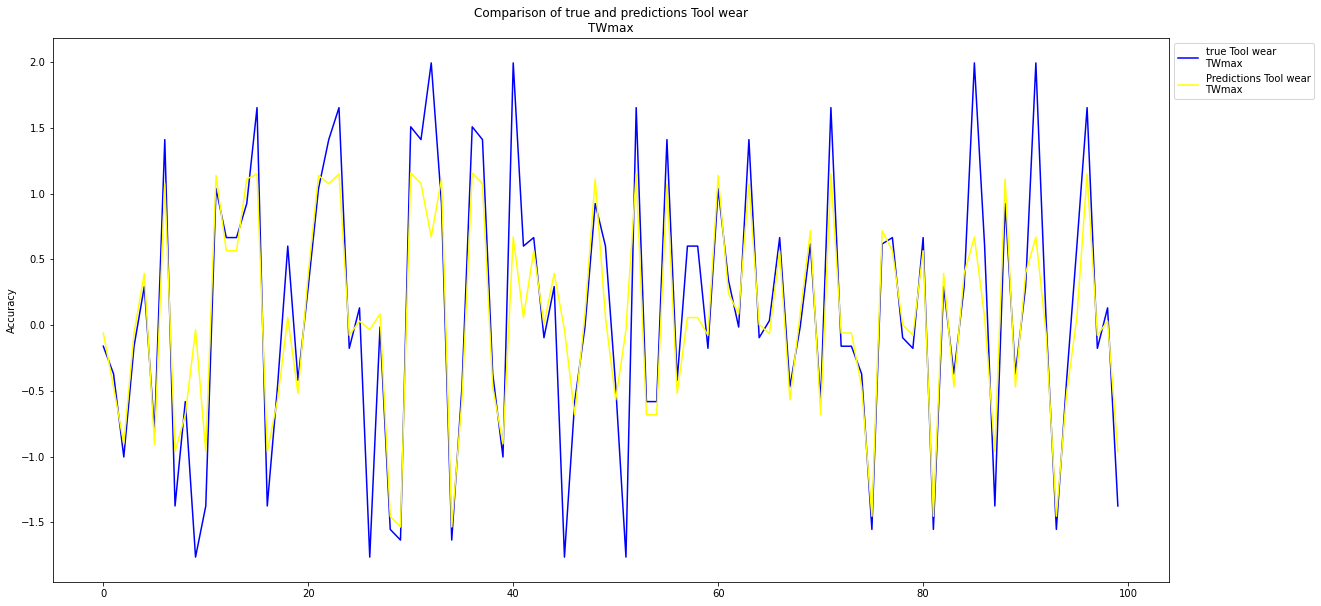

In [37]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(comparison['True Tool wear\nTWmax'].values,color='blue',label='true Tool wear\nTWmax')
plt.plot(comparison['Predicted Tool wear\nTWmax'].values,color='yellow',label='Predictions Tool wear\nTWmax')

plt.title('Comparison of true and predictions Tool wear\nTWmax')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [38]:
comparison.to_csv(r'SVR.csv', index = False, header=True)